In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def load_dataset(file_path):
    dataset = pd.read_csv(file_path)
    dataset.fillna(method='ffill', inplace=True)
    return dataset

In [3]:
def scale_features(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [4]:
def plot_correlation_matrix(dataset):
    cor = dataset.corr().round(2)
    sns.heatmap(data=cor, annot=True)
    plt.show()

In [5]:
def plot_histogram(dataset, column):
    plt.hist(dataset[column], bins=30)
    plt.xlabel("House prices in $1000")
    plt.show()

In [6]:
def train_linear_regression(X_train, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr

In [7]:
def evaluate_linear_regression(model, X_train, y_train):
    y_pred = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print("RMSE: ", rmse)
    plt.scatter(y_train, y_pred, color='blue', 
                label='Actual vs Predicted')
    plt.plot([min(y_train), max(y_train)], 
             [min(y_train), max(y_train)], 
             linestyle='-', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices (Linear Regression)")
    plt.legend()
    plt.show()

In [8]:
def build_nn_model(input_dim):
    model = Sequential(name='BostonHousingPrices')
    model.add(Dense(100, input_dim=input_dim, activation='relu', name='Hidden-1'))
    model.add(Dense(100, activation='relu', name='Hidden-2'))
    model.add(Dense(1, activation='linear', name='Output'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [12]:
def train_nn_model(model, X_train, y_train, batch_size=16, epochs=150):
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
    return hist

In [13]:
def plot_training_history(histories, labels):
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(histories[0].history['mean_squared_error']) + 1)
    for hist, label in zip(histories, labels):
        plt.plot(epochs, hist.history['mean_squared_error'], label=label)
    plt.title('Comparison of Training Mean Squared Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

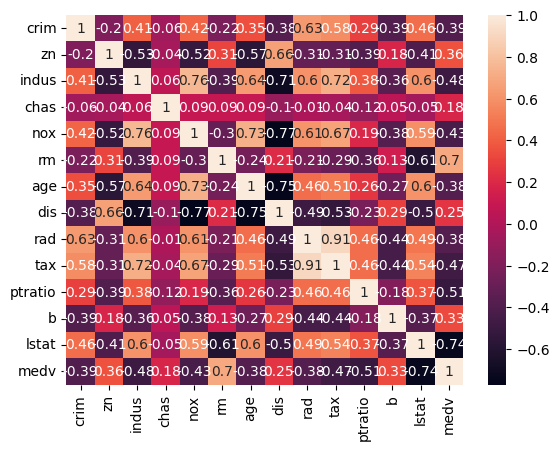

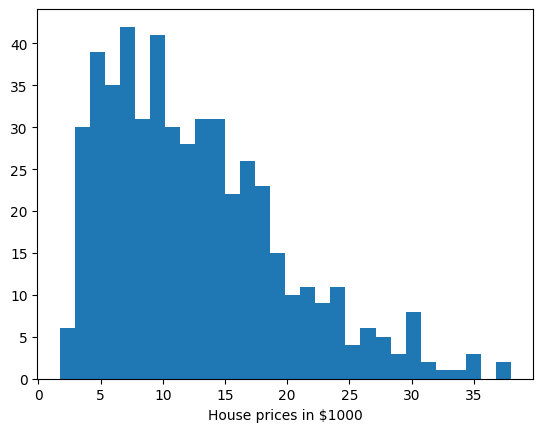

RMSE:  4.4674623461466405


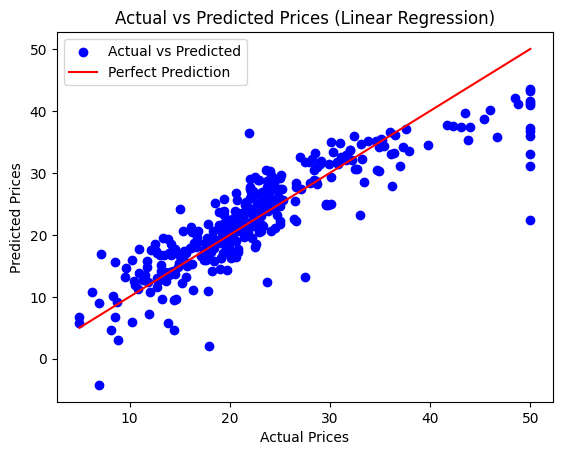

Epoch 1/150
23/23 [==============================] - 2s 4ms/step - loss: 546.6852 - mean_squared_error: 546.6852
Epoch 2/150
23/23 [==============================] - 0s 4ms/step - loss: 373.0923 - mean_squared_error: 373.0923
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 152.3483 - mean_squared_error: 152.3483
Epoch 4/150
23/23 [==============================] - 0s 4ms/step - loss: 48.1524 - mean_squared_error: 48.1524
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 30.2732 - mean_squared_error: 30.2732
Epoch 6/150
23/23 [==============================] - 0s 3ms/step - loss: 22.5539 - mean_squared_error: 22.5539
Epoch 7/150
23/23 [==============================] - 0s 3ms/step - loss: 19.6366 - mean_squared_error: 19.6366
Epoch 8/150
23/23 [==============================] - 0s 4ms/step - loss: 18.6585 - mean_squared_error: 18.6585
Epoch 9/150
23/23 [==============================] - 0s 3ms/step - loss: 18.0109 - mean_squared_error: 18.

23/23 [==============================] - 0s 3ms/step - loss: 2.4152 - mean_squared_error: 2.4152
Epoch 150/150
23/23 [==============================] - 0s 3ms/step - loss: 2.3517 - mean_squared_error: 2.3517
Epoch 1/150
23/23 [==============================] - 1s 3ms/step - loss: 477.7706 - mean_squared_error: 477.7706
Epoch 2/150
23/23 [==============================] - 0s 3ms/step - loss: 228.8849 - mean_squared_error: 228.8849
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 73.0232 - mean_squared_error: 73.0232
Epoch 4/150
23/23 [==============================] - 0s 3ms/step - loss: 33.8933 - mean_squared_error: 33.8933
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 23.3733 - mean_squared_error: 23.3733
Epoch 6/150
23/23 [==============================] - 0s 3ms/step - loss: 19.2953 - mean_squared_error: 19.2953
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 16.5869 - mean_squared_error: 16.5869
Epoch 8/150

23/23 [==============================] - 0s 3ms/step - loss: 2.2865 - mean_squared_error: 2.2865
Epoch 148/150
23/23 [==============================] - 0s 3ms/step - loss: 1.9079 - mean_squared_error: 1.9079
Epoch 149/150
23/23 [==============================] - 0s 3ms/step - loss: 2.0180 - mean_squared_error: 2.0180
Epoch 150/150
23/23 [==============================] - 0s 3ms/step - loss: 2.0776 - mean_squared_error: 2.0776


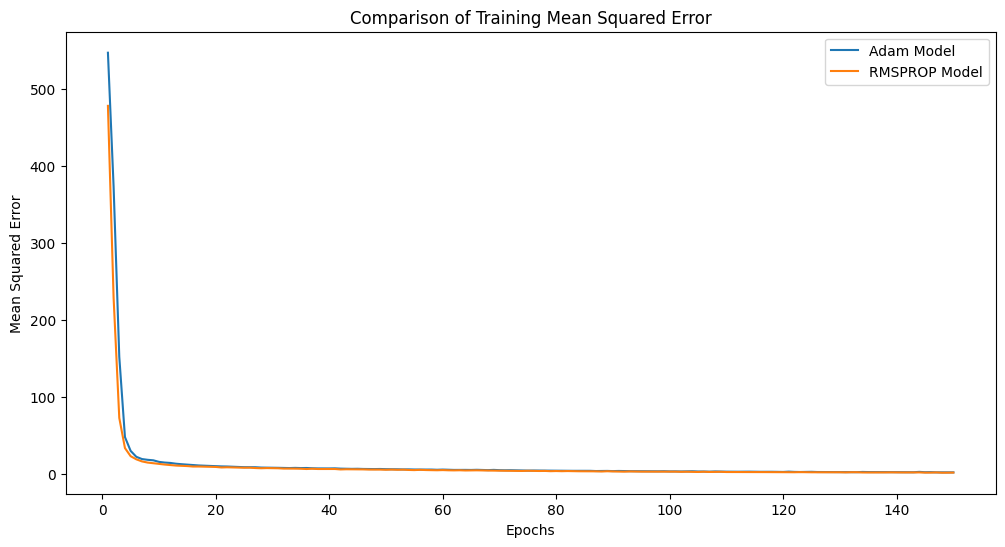

In [14]:
def main():
    dataset = load_dataset('BostonHousing.csv')
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    X = scale_features(X)
    plot_correlation_matrix(dataset)
    plot_histogram(dataset, 'lstat')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    lr_model = train_linear_regression(X_train, y_train)
    evaluate_linear_regression(lr_model, X_train, y_train)
    nn_model = build_nn_model(input_dim=X_train.shape[1])
    hist_lr = train_nn_model(nn_model, X_train, y_train)
    nn_model2 = build_nn_model(input_dim=X_train.shape[1])
    nn_model2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_squared_error'])
    hist_rmsprop = train_nn_model(nn_model2, X_train, y_train)
    plot_training_history([hist_lr, hist_rmsprop], ['Adam Model', 'RMSPROP Model'])

if __name__ == "__main__":
    main()